<a href="https://colab.research.google.com/github/MutiaraCR/klasifikasi-produksi-tanaman/blob/main/Klasifikasi_Produksi_Quantile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Data

In [2]:
from os import sep
path="/content/drive/MyDrive/Dataset KP/Produksi Tanaman Sayur (Kw-Kg).xlsx"
df = pd.read_excel(path)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

Tahun          Kecamatan  Luas Wilayah (Km2)  Bawang Daun (kuintal)  \
0     2018       Metro Kibang             76.7783                      0   
1     2018         Batanghari            148.8795                      0   
2     2018          Sekampung            148.3439                      0   
3     2018          Margatiga            250.7294                      0   
4     2018     Sekampung Udik            339.1245                    106   
5     2018             Jabung            267.8454                      0   
6     2018        Pasir Sakti            193.9383                      0   
7     2018        Waway Karya            211.0732                      0   
8     2018    Marga Sekampung            177.3234                      0   
9     2018  Labuhan Maringgai            194.9873                      0   
10    2018       Mataram Baru             79.5611                      0   
11    2018  Bandar Sribhawono            185.7067                      0   
12    2018          Melinting            139.2974                      0   
13    2018   Gunung Pelindung             78.5225                      0   
14    2018         Way Jepara            229.2692                      0   
15    2018       Braja Slebah            247.6068                      0   
16    2018       Labuhan Ratu            485.5122                      0   
17    2018           Sukadana            756.7550                      0   
18    2018         Bumi Agung             73.1747                      0   
19    2018   Batanghari Nuban            180.6884                      0   
20    2018         Pekalongan            100.1281                    285   
21    2018        Raman Utara            161.3691                      0   
22    2018        Purbolinggo            222.0337                      0   
23    2018         Way Bungur            376.3819                      0   
24    2018      Lampung Timur           5325.0300                    391   
25    2019       Metro Kibang             76.7783                      0   
26    2019         Batanghari            148.8795                      0   
27    2019          Sekampung            148.3439                      0   
28    2019          Margatiga            250.7294                      0   
29    2019     Sekampung Udik            339.1245                    106   
30    2019             Jabung            267.8454                      0   
31    2019        Pasir Sakti            193.9383                      0   
32    2019        Waway Karya            211.0732                      0   
33    2019    Marga Sekampung            177.3234                      0   
34    2019  Labuhan Maringgai            194.9873                      0   
35    2019       Mataram Baru             79.5611                      0   
36    2019  Bandar Sribhawono            185.7067                      0   
37    2019          Melinting            139.2974                      0   
38    2019   Gunung Pelindung             78.5225                      0   
39    2019         Way Jepara            229.2692                      0   
40    2019       Braja Slebah            247.6068                      0   
41    2019       Labuhan Ratu            485.5122                      0   
42    2019           Sukadana            756.7550                      0   
43    2019         Bumi Agung             73.1747                      0   
44    2019   Batanghari Nuban            180.6884                      0   
45    2019         Pekalongan            100.1281                   1623   
46    2019        Raman Utara            161.3691                      0   
47    2019        Purbolinggo            222.0337                      0   
48    2019         Way Bungur            376.3819                      0   
49    2019      Lampung Timur           5325.0300                   1729   
50    2020       Metro Kibang             76.7783                      0   
51    2020         Batanghari            148.8795    

# EDA & Pereprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tahun                              150 non-null    int64  
 1   Kecamatan                          150 non-null    object 
 2   Luas Wilayah (Km2)                 150 non-null    float64
 3   Bawang Daun (kuintal)              150 non-null    int64  
 4   Bawang Merah (kuintal)             150 non-null    int64  
 5   Bayam (kuintal)                    150 non-null    int64  
 6   Blewah (kuintal)                   150 non-null    int64  
 7   Buncis (kuintal)                   150 non-null    int64  
 8   Cabai Besar (kuintal)              150 non-null    int64  
 9   Cabai Rawit (kuintal)              150 non-null    int64  
 10  Jamur (kilogram)                   150 non-null    int64  
 11  Kacang Merah (kuintal)             150 non-null    int64  

In [4]:
df.describe()

Tahun  Luas Wilayah (Km2)  Bawang Daun (kuintal)  \
count   150.000000          150.000000             150.000000   
mean   2020.500000          426.002400             125.486667   
std       1.713547         1013.810468             461.539454   
min    2018.000000           73.174700               0.000000   
25%    2019.000000          148.343900               0.000000   
50%    2020.500000          193.938300               0.000000   
75%    2022.000000          250.729400               0.000000   
max    2023.000000         5325.030000            3364.000000   

       Bawang Merah (kuintal)  Bayam (kuintal)  Blewah (kuintal)  \
count              150.000000       150.000000        150.000000   
mean                27.973333       277.033333          5.573333   
std                116.085536       877.307530         30.693625   
min                  0.000000         0.000000          0.000000   
25%                  0.000000         0.000000          0.000000   
50%                  0.000000        25.500000          0.000000   
75%                  0.000000       139.500000          0.000000   
max               1033.000000      6716.000000        239.000000   

       Buncis (kuintal)  Cabai Besar (kuintal)  Cabai Rawit (kuintal)  \
count        150.000000             150.000000             150.000000   
mean          95.026667             952.646667             347.400000   
std          335.657183            3650.505840             948.654816   
min            0.000000               0.000000               0.000000   
25%            0.000000               0.000000              23.250000   
50%            0.000000               0.000000             102.000000   
75%           26.500000             171.750000             238.750000   
max         2618.000000           24491.000000            7437.000000   

       Jamur (kilogram)  Kacang Merah (kuintal)  Kacang Panjang (kuintal)  \
count        150.000000              150.000000                150.000000   
mean         483.200000                0.333333                670.600000   
std         2180.836635                2.398732               1868.436525   
min            0.000000                0.000000                  0.000000   
25%            0.000000                0.000000                 44.000000   
50%            0.000000                0.000000                148.000000   
75%            0.000000                0.000000                378.750000   
max        17298.000000               24.000000              13397.000000   

       Kangkung (kuintal)  Kembang Kol (kuintal)  Ketimun (kuintal)  \
count          150.000000             150.000000         150.000000   
mean           481.500000              67.240000         622.373333   
std           1530.387786             311.546256        2036.660550   
min              0.000000               0.000000           0.000000   
25%              0.000000               0.000000          12.250000   
50%             36.000000               0.000000          96.000000   
75%            181.000000               0.000000         279.250000   
max          13161.000000            2130.000000       16609.000000   

       Kubis (kuintal)  Labu Siam (kuintal)  Melon (kuintal)  \
count       150.000000           150.000000       150.000000   
mean          0.533333            10.693333        34.200000   
std           4.603277            32.821041       150.899584   
min           0.000000             0.000000         0.000000   
25%           0.000000             0.000000         0.000000   
50%           0.000000             0.000000         0.000000   
75%           0.000000             0.000000         0.000000   
max          40.000000           191.000000      1552.000000   

       Paprika (kuintal)  Petsai/Sawi (kuintal)  Semangka (kuintal)  \
count         150.000000             150.000000          150.000000   
mean            0.400000              93.733333          640.960000   
std             2.148825        

In [5]:
# Mengurutkan data berdasarkan Kecamatan dan Tahun
df = df.sort_values(by=['Kecamatan', 'Tahun']).reset_index(drop=True)
df

Tahun          Kecamatan  Luas Wilayah (Km2)  Bawang Daun (kuintal)  \
0     2018  Bandar Sribhawono            185.7067                      0   
1     2019  Bandar Sribhawono            185.7067                      0   
2     2020  Bandar Sribhawono            185.7067                      0   
3     2021  Bandar Sribhawono            185.7067                      3   
4     2022  Bandar Sribhawono            185.7067                    113   
5     2023  Bandar Sribhawono            185.7067                    142   
6     2018         Batanghari            148.8795                      0   
7     2019         Batanghari            148.8795                      0   
8     2020         Batanghari            148.8795                      0   
9     2021         Batanghari            148.8795                   2645   
10    2022         Batanghari            148.8795                    987   
11    2023         Batanghari            148.8795                    137   
12    2018   Batanghari Nuban            180.6884                      0   
13    2019   Batanghari Nuban            180.6884                      0   
14    2020   Batanghari Nuban            180.6884                      0   
15    2021   Batanghari Nuban            180.6884                      0   
16    2022   Batanghari Nuban            180.6884                      0   
17    2023   Batanghari Nuban            180.6884                      0   
18    2018       Braja Slebah            247.6068                      0   
19    2019       Braja Slebah            247.6068                      0   
20    2020       Braja Slebah            247.6068                     52   
21    2021       Braja Slebah            247.6068                     93   
22    2022       Braja Slebah            247.6068                    183   
23    2023       Braja Slebah            247.6068                      7   
24    2018         Bumi Agung             73.1747                      0   
25    2019         Bumi Agung             73.1747                      0   
26    2020         Bumi Agung             73.1747                      0   
27    2021         Bumi Agung             73.1747                      0   
28    2022         Bumi Agung             73.1747                      0   
29    2023         Bumi Agung             73.1747                      0   
30    2018   Gunung Pelindung             78.5225                      0   
31    2019   Gunung Pelindung             78.5225                      0   
32    2020   Gunung Pelindung             78.5225                      0   
33    2021   Gunung Pelindung             78.5225                      0   
34    2022   Gunung Pelindung             78.5225                     45   
35    2023   Gunung Pelindung             78.5225                     44   
36    2018             Jabung            267.8454                      0   
37    2019             Jabung            267.8454                      0   
38    2020             Jabung            267.8454                      0   
39    2021             Jabung            267.8454                      0   
40    2022             Jabung            267.8454                      0   
41    2023             Jabung            267.8454                     32   
42    2018  Labuhan Maringgai            194.9873                      0   
43    2019  Labuhan Maringgai            194.9873                      0   
44    2020  Labuhan Maringgai            194.9873                      0   
45    2021  Labuhan Maringgai            194.9873                      0   
46    2022  Labuhan Maringgai            194.9873                      0   
47    2023  Labuhan Maringgai            194.9873                     77   
48    2018       Labuhan Ratu            485.5122                      0   
49    2019       Labuhan Ratu            485.5122                      0   
50    2020       Labuhan Ratu            485.5122                      0   
51    2021       Labuhan Ratu            485.5122    

### *Drop baris Lampung Timur*

In [6]:
df = df[df['Kecamatan'] != 'Lampung Timur']
df

Tahun          Kecamatan  Luas Wilayah (Km2)  Bawang Daun (kuintal)  \
0     2018  Bandar Sribhawono            185.7067                      0   
1     2019  Bandar Sribhawono            185.7067                      0   
2     2020  Bandar Sribhawono            185.7067                      0   
3     2021  Bandar Sribhawono            185.7067                      3   
4     2022  Bandar Sribhawono            185.7067                    113   
5     2023  Bandar Sribhawono            185.7067                    142   
6     2018         Batanghari            148.8795                      0   
7     2019         Batanghari            148.8795                      0   
8     2020         Batanghari            148.8795                      0   
9     2021         Batanghari            148.8795                   2645   
10    2022         Batanghari            148.8795                    987   
11    2023         Batanghari            148.8795                    137   
12    2018   Batanghari Nuban            180.6884                      0   
13    2019   Batanghari Nuban            180.6884                      0   
14    2020   Batanghari Nuban            180.6884                      0   
15    2021   Batanghari Nuban            180.6884                      0   
16    2022   Batanghari Nuban            180.6884                      0   
17    2023   Batanghari Nuban            180.6884                      0   
18    2018       Braja Slebah            247.6068                      0   
19    2019       Braja Slebah            247.6068                      0   
20    2020       Braja Slebah            247.6068                     52   
21    2021       Braja Slebah            247.6068                     93   
22    2022       Braja Slebah            247.6068                    183   
23    2023       Braja Slebah            247.6068                      7   
24    2018         Bumi Agung             73.1747                      0   
25    2019         Bumi Agung             73.1747                      0   
26    2020         Bumi Agung             73.1747                      0   
27    2021         Bumi Agung             73.1747                      0   
28    2022         Bumi Agung             73.1747                      0   
29    2023         Bumi Agung             73.1747                      0   
30    2018   Gunung Pelindung             78.5225                      0   
31    2019   Gunung Pelindung             78.5225                      0   
32    2020   Gunung Pelindung             78.5225                      0   
33    2021   Gunung Pelindung             78.5225                      0   
34    2022   Gunung Pelindung             78.5225                     45   
35    2023   Gunung Pelindung             78.5225                     44   
36    2018             Jabung            267.8454                      0   
37    2019             Jabung            267.8454                      0   
38    2020             Jabung            267.8454                      0   
39    2021             Jabung            267.8454                      0   
40    2022             Jabung            267.8454                      0   
41    2023             Jabung            267.8454                     32   
42    2018  Labuhan Maringgai            194.9873                      0   
43    2019  Labuhan Maringgai            194.9873                      0   
44    2020  Labuhan Maringgai            194.9873                      0   
45    2021  Labuhan Maringgai            194.9873                      0   
46    2022  Labuhan Maringgai            194.9873                      0   
47    2023  Labuhan Maringgai            194.9873                     77   
48    2018       Labuhan Ratu            485.5122                      0   
49    2019       Labuhan Ratu            485.5122                      0   
50    2020       Labuhan Ratu            485.5122                      0   
51    2021       Labuhan Ratu            485.5122    

### *Mengelola kolom-kolom jenis Cabai Besar*

In [7]:
df['Cabai besar (kuintal)'] = df['Cabai Besar/TW/Teropong (kuintal)'] + df['Cabai Besar (kuintal)']
df

<ipython-input-7-7a7a440678dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabai besar (kuintal)'] = df['Cabai Besar/TW/Teropong (kuintal)'] + df['Cabai Besar (kuintal)']


Tahun          Kecamatan  Luas Wilayah (Km2)  Bawang Daun (kuintal)  \
0     2018  Bandar Sribhawono            185.7067                      0   
1     2019  Bandar Sribhawono            185.7067                      0   
2     2020  Bandar Sribhawono            185.7067                      0   
3     2021  Bandar Sribhawono            185.7067                      3   
4     2022  Bandar Sribhawono            185.7067                    113   
5     2023  Bandar Sribhawono            185.7067                    142   
6     2018         Batanghari            148.8795                      0   
7     2019         Batanghari            148.8795                      0   
8     2020         Batanghari            148.8795                      0   
9     2021         Batanghari            148.8795                   2645   
10    2022         Batanghari            148.8795                    987   
11    2023         Batanghari            148.8795                    137   
12    2018   Batanghari Nuban            180.6884                      0   
13    2019   Batanghari Nuban            180.6884                      0   
14    2020   Batanghari Nuban            180.6884                      0   
15    2021   Batanghari Nuban            180.6884                      0   
16    2022   Batanghari Nuban            180.6884                      0   
17    2023   Batanghari Nuban            180.6884                      0   
18    2018       Braja Slebah            247.6068                      0   
19    2019       Braja Slebah            247.6068                      0   
20    2020       Braja Slebah            247.6068                     52   
21    2021       Braja Slebah            247.6068                     93   
22    2022       Braja Slebah            247.6068                    183   
23    2023       Braja Slebah            247.6068                      7   
24    2018         Bumi Agung             73.1747                      0   
25    2019         Bumi Agung             73.1747                      0   
26    2020         Bumi Agung             73.1747                      0   
27    2021         Bumi Agung             73.1747                      0   
28    2022         Bumi Agung             73.1747                      0   
29    2023         Bumi Agung             73.1747                      0   
30    2018   Gunung Pelindung             78.5225                      0   
31    2019   Gunung Pelindung             78.5225                      0   
32    2020   Gunung Pelindung             78.5225                      0   
33    2021   Gunung Pelindung             78.5225                      0   
34    2022   Gunung Pelindung             78.5225                     45   
35    2023   Gunung Pelindung             78.5225                     44   
36    2018             Jabung            267.8454                      0   
37    2019             Jabung            267.8454                      0   
38    2020             Jabung            267.8454                      0   
39    2021             Jabung            267.8454                      0   
40    2022             Jabung            267.8454                      0   
41    2023             Jabung            267.8454                     32   
42    2018  Labuhan Maringgai            194.9873                      0   
43    2019  Labuhan Maringgai            194.9873                      0   
44    2020  Labuhan Maringgai            194.9873                      0   
45    2021  Labuhan Maringgai            194.9873                      0   
46    2022  Labuhan Maringgai            194.9873                      0   
47    2023  Labuhan Maringgai            194.9873                     77   
48    2018       Labuhan Ratu            485.5122                      0   
49    2019       Labuhan Ratu            485.5122                      0   
50    2020       Labuhan Ratu            485.5122                      0   
51    2021       Labuhan Ratu            485.5122    

In [8]:
# menghapus 2 kolom sebelumnya, karena hasil penjumlahan di masukkan ke kolom baru
df = df.drop(['Cabai Besar/TW/Teropong (kuintal)', 'Cabai Besar (kuintal)'], axis=1, errors='ignore')
df

Tahun          Kecamatan  Luas Wilayah (Km2)  Bawang Daun (kuintal)  \
0     2018  Bandar Sribhawono            185.7067                      0   
1     2019  Bandar Sribhawono            185.7067                      0   
2     2020  Bandar Sribhawono            185.7067                      0   
3     2021  Bandar Sribhawono            185.7067                      3   
4     2022  Bandar Sribhawono            185.7067                    113   
5     2023  Bandar Sribhawono            185.7067                    142   
6     2018         Batanghari            148.8795                      0   
7     2019         Batanghari            148.8795                      0   
8     2020         Batanghari            148.8795                      0   
9     2021         Batanghari            148.8795                   2645   
10    2022         Batanghari            148.8795                    987   
11    2023         Batanghari            148.8795                    137   
12    2018   Batanghari Nuban            180.6884                      0   
13    2019   Batanghari Nuban            180.6884                      0   
14    2020   Batanghari Nuban            180.6884                      0   
15    2021   Batanghari Nuban            180.6884                      0   
16    2022   Batanghari Nuban            180.6884                      0   
17    2023   Batanghari Nuban            180.6884                      0   
18    2018       Braja Slebah            247.6068                      0   
19    2019       Braja Slebah            247.6068                      0   
20    2020       Braja Slebah            247.6068                     52   
21    2021       Braja Slebah            247.6068                     93   
22    2022       Braja Slebah            247.6068                    183   
23    2023       Braja Slebah            247.6068                      7   
24    2018         Bumi Agung             73.1747                      0   
25    2019         Bumi Agung             73.1747                      0   
26    2020         Bumi Agung             73.1747                      0   
27    2021         Bumi Agung             73.1747                      0   
28    2022         Bumi Agung             73.1747                      0   
29    2023         Bumi Agung             73.1747                      0   
30    2018   Gunung Pelindung             78.5225                      0   
31    2019   Gunung Pelindung             78.5225                      0   
32    2020   Gunung Pelindung             78.5225                      0   
33    2021   Gunung Pelindung             78.5225                      0   
34    2022   Gunung Pelindung             78.5225                     45   
35    2023   Gunung Pelindung             78.5225                     44   
36    2018             Jabung            267.8454                      0   
37    2019             Jabung            267.8454                      0   
38    2020             Jabung            267.8454                      0   
39    2021             Jabung            267.8454                      0   
40    2022             Jabung            267.8454                      0   
41    2023             Jabung            267.8454                     32   
42    2018  Labuhan Maringgai            194.9873                      0   
43    2019  Labuhan Maringgai            194.9873                      0   
44    2020  Labuhan Maringgai            194.9873                      0   
45    2021  Labuhan Maringgai            194.9873                      0   
46    2022  Labuhan Maringgai            194.9873                      0   
47    2023  Labuhan Maringgai            194.9873                     77   
48    2018       Labuhan Ratu            485.5122                      0   
49    2019       Labuhan Ratu            485.5122                      0   
50    2020       Labuhan Ratu            485.5122                      0   
51    2021       Labuhan Ratu            485.5122    

In [9]:
# ganti nama kolom cabai besar
df = df.rename(columns={'Cabai besar (kuintal)': 'Cabai Besar (kuintal)'})
df

Tahun          Kecamatan  Luas Wilayah (Km2)  Bawang Daun (kuintal)  \
0     2018  Bandar Sribhawono            185.7067                      0   
1     2019  Bandar Sribhawono            185.7067                      0   
2     2020  Bandar Sribhawono            185.7067                      0   
3     2021  Bandar Sribhawono            185.7067                      3   
4     2022  Bandar Sribhawono            185.7067                    113   
5     2023  Bandar Sribhawono            185.7067                    142   
6     2018         Batanghari            148.8795                      0   
7     2019         Batanghari            148.8795                      0   
8     2020         Batanghari            148.8795                      0   
9     2021         Batanghari            148.8795                   2645   
10    2022         Batanghari            148.8795                    987   
11    2023         Batanghari            148.8795                    137   
12    2018   Batanghari Nuban            180.6884                      0   
13    2019   Batanghari Nuban            180.6884                      0   
14    2020   Batanghari Nuban            180.6884                      0   
15    2021   Batanghari Nuban            180.6884                      0   
16    2022   Batanghari Nuban            180.6884                      0   
17    2023   Batanghari Nuban            180.6884                      0   
18    2018       Braja Slebah            247.6068                      0   
19    2019       Braja Slebah            247.6068                      0   
20    2020       Braja Slebah            247.6068                     52   
21    2021       Braja Slebah            247.6068                     93   
22    2022       Braja Slebah            247.6068                    183   
23    2023       Braja Slebah            247.6068                      7   
24    2018         Bumi Agung             73.1747                      0   
25    2019         Bumi Agung             73.1747                      0   
26    2020         Bumi Agung             73.1747                      0   
27    2021         Bumi Agung             73.1747                      0   
28    2022         Bumi Agung             73.1747                      0   
29    2023         Bumi Agung             73.1747                      0   
30    2018   Gunung Pelindung             78.5225                      0   
31    2019   Gunung Pelindung             78.5225                      0   
32    2020   Gunung Pelindung             78.5225                      0   
33    2021   Gunung Pelindung             78.5225                      0   
34    2022   Gunung Pelindung             78.5225                     45   
35    2023   Gunung Pelindung             78.5225                     44   
36    2018             Jabung            267.8454                      0   
37    2019             Jabung            267.8454                      0   
38    2020             Jabung            267.8454                      0   
39    2021             Jabung            267.8454                      0   
40    2022             Jabung            267.8454                      0   
41    2023             Jabung            267.8454                     32   
42    2018  Labuhan Maringgai            194.9873                      0   
43    2019  Labuhan Maringgai            194.9873                      0   
44    2020  Labuhan Maringgai            194.9873                      0   
45    2021  Labuhan Maringgai            194.9873                      0   
46    2022  Labuhan Maringgai            194.9873                      0   
47    2023  Labuhan Maringgai            194.9873                     77   
48    2018       Labuhan Ratu            485.5122                      0   
49    2019       Labuhan Ratu            485.5122                      0   
50    2020       Labuhan Ratu            485.5122                      0   
51    2021       Labuhan Ratu            485.5122    

### *Mengelola kolom-kolom jenis Jamur*

In [10]:
df['jamur-jamur (kilogram)'] = df['Jamur (kilogram)'] + df['Jamur Tiram (kilogram)'] + df['Jamur Merang (kilogram)'] + df['Jamur Lainnya (kilogram)']
df = df.drop(['Jamur (kilogram)', 'Jamur Tiram (kilogram)', 'Jamur Merang (kilogram)', 'Jamur Lainnya (kilogram)'], axis=1, errors='ignore')
df

Tahun          Kecamatan  Luas Wilayah (Km2)  Bawang Daun (kuintal)  \
0     2018  Bandar Sribhawono            185.7067                      0   
1     2019  Bandar Sribhawono            185.7067                      0   
2     2020  Bandar Sribhawono            185.7067                      0   
3     2021  Bandar Sribhawono            185.7067                      3   
4     2022  Bandar Sribhawono            185.7067                    113   
5     2023  Bandar Sribhawono            185.7067                    142   
6     2018         Batanghari            148.8795                      0   
7     2019         Batanghari            148.8795                      0   
8     2020         Batanghari            148.8795                      0   
9     2021         Batanghari            148.8795                   2645   
10    2022         Batanghari            148.8795                    987   
11    2023         Batanghari            148.8795                    137   
12    2018   Batanghari Nuban            180.6884                      0   
13    2019   Batanghari Nuban            180.6884                      0   
14    2020   Batanghari Nuban            180.6884                      0   
15    2021   Batanghari Nuban            180.6884                      0   
16    2022   Batanghari Nuban            180.6884                      0   
17    2023   Batanghari Nuban            180.6884                      0   
18    2018       Braja Slebah            247.6068                      0   
19    2019       Braja Slebah            247.6068                      0   
20    2020       Braja Slebah            247.6068                     52   
21    2021       Braja Slebah            247.6068                     93   
22    2022       Braja Slebah            247.6068                    183   
23    2023       Braja Slebah            247.6068                      7   
24    2018         Bumi Agung             73.1747                      0   
25    2019         Bumi Agung             73.1747                      0   
26    2020         Bumi Agung             73.1747                      0   
27    2021         Bumi Agung             73.1747                      0   
28    2022         Bumi Agung             73.1747                      0   
29    2023         Bumi Agung             73.1747                      0   
30    2018   Gunung Pelindung             78.5225                      0   
31    2019   Gunung Pelindung             78.5225                      0   
32    2020   Gunung Pelindung             78.5225                      0   
33    2021   Gunung Pelindung             78.5225                      0   
34    2022   Gunung Pelindung             78.5225                     45   
35    2023   Gunung Pelindung             78.5225                     44   
36    2018             Jabung            267.8454                      0   
37    2019             Jabung            267.8454                      0   
38    2020             Jabung            267.8454                      0   
39    2021             Jabung            267.8454                      0   
40    2022             Jabung            267.8454                      0   
41    2023             Jabung            267.8454                     32   
42    2018  Labuhan Maringgai            194.9873                      0   
43    2019  Labuhan Maringgai            194.9873                      0   
44    2020  Labuhan Maringgai            194.9873                      0   
45    2021  Labuhan Maringgai            194.9873                      0   
46    2022  Labuhan Maringgai            194.9873                      0   
47    2023  Labuhan Maringgai            194.9873                     77   
48    2018       Labuhan Ratu            485.5122                      0   
49    2019       Labuhan Ratu            485.5122                      0   
50    2020       Labuhan Ratu            485.5122                      0   
51    2021       Labuhan Ratu            485.5122    

In [11]:
df['Jamur (kuintal)'] = df['jamur-jamur (kilogram)'] / 100
df = df.drop(['jamur-jamur (kilogram)'], axis=1, errors='ignore')
df

Tahun          Kecamatan  Luas Wilayah (Km2)  Bawang Daun (kuintal)  \
0     2018  Bandar Sribhawono            185.7067                      0   
1     2019  Bandar Sribhawono            185.7067                      0   
2     2020  Bandar Sribhawono            185.7067                      0   
3     2021  Bandar Sribhawono            185.7067                      3   
4     2022  Bandar Sribhawono            185.7067                    113   
5     2023  Bandar Sribhawono            185.7067                    142   
6     2018         Batanghari            148.8795                      0   
7     2019         Batanghari            148.8795                      0   
8     2020         Batanghari            148.8795                      0   
9     2021         Batanghari            148.8795                   2645   
10    2022         Batanghari            148.8795                    987   
11    2023         Batanghari            148.8795                    137   
12    2018   Batanghari Nuban            180.6884                      0   
13    2019   Batanghari Nuban            180.6884                      0   
14    2020   Batanghari Nuban            180.6884                      0   
15    2021   Batanghari Nuban            180.6884                      0   
16    2022   Batanghari Nuban            180.6884                      0   
17    2023   Batanghari Nuban            180.6884                      0   
18    2018       Braja Slebah            247.6068                      0   
19    2019       Braja Slebah            247.6068                      0   
20    2020       Braja Slebah            247.6068                     52   
21    2021       Braja Slebah            247.6068                     93   
22    2022       Braja Slebah            247.6068                    183   
23    2023       Braja Slebah            247.6068                      7   
24    2018         Bumi Agung             73.1747                      0   
25    2019         Bumi Agung             73.1747                      0   
26    2020         Bumi Agung             73.1747                      0   
27    2021         Bumi Agung             73.1747                      0   
28    2022         Bumi Agung             73.1747                      0   
29    2023         Bumi Agung             73.1747                      0   
30    2018   Gunung Pelindung             78.5225                      0   
31    2019   Gunung Pelindung             78.5225                      0   
32    2020   Gunung Pelindung             78.5225                      0   
33    2021   Gunung Pelindung             78.5225                      0   
34    2022   Gunung Pelindung             78.5225                     45   
35    2023   Gunung Pelindung             78.5225                     44   
36    2018             Jabung            267.8454                      0   
37    2019             Jabung            267.8454                      0   
38    2020             Jabung            267.8454                      0   
39    2021             Jabung            267.8454                      0   
40    2022             Jabung            267.8454                      0   
41    2023             Jabung            267.8454                     32   
42    2018  Labuhan Maringgai            194.9873                      0   
43    2019  Labuhan Maringgai            194.9873                      0   
44    2020  Labuhan Maringgai            194.9873                      0   
45    2021  Labuhan Maringgai            194.9873                      0   
46    2022  Labuhan Maringgai            194.9873                      0   
47    2023  Labuhan Maringgai            194.9873                     77   
48    2018       Labuhan Ratu            485.5122                      0   
49    2019       Labuhan Ratu            485.5122                      0   
50    2020       Labuhan Ratu            485.5122                      0   
51    2021       Labuhan Ratu            485.5122    

## Tambah kolom Total Produksi tiap jenis sayur

In [12]:
for col in df.columns:
    if df[col].dtype == 'int64' and col != 'Tahun':
        df[col] = df[col].astype('float64')

df

Tahun          Kecamatan  Luas Wilayah (Km2)  Bawang Daun (kuintal)  \
0     2018  Bandar Sribhawono            185.7067                    0.0   
1     2019  Bandar Sribhawono            185.7067                    0.0   
2     2020  Bandar Sribhawono            185.7067                    0.0   
3     2021  Bandar Sribhawono            185.7067                    3.0   
4     2022  Bandar Sribhawono            185.7067                  113.0   
5     2023  Bandar Sribhawono            185.7067                  142.0   
6     2018         Batanghari            148.8795                    0.0   
7     2019         Batanghari            148.8795                    0.0   
8     2020         Batanghari            148.8795                    0.0   
9     2021         Batanghari            148.8795                 2645.0   
10    2022         Batanghari            148.8795                  987.0   
11    2023         Batanghari            148.8795                  137.0   
12    2018   Batanghari Nuban            180.6884                    0.0   
13    2019   Batanghari Nuban            180.6884                    0.0   
14    2020   Batanghari Nuban            180.6884                    0.0   
15    2021   Batanghari Nuban            180.6884                    0.0   
16    2022   Batanghari Nuban            180.6884                    0.0   
17    2023   Batanghari Nuban            180.6884                    0.0   
18    2018       Braja Slebah            247.6068                    0.0   
19    2019       Braja Slebah            247.6068                    0.0   
20    2020       Braja Slebah            247.6068                   52.0   
21    2021       Braja Slebah            247.6068                   93.0   
22    2022       Braja Slebah            247.6068                  183.0   
23    2023       Braja Slebah            247.6068                    7.0   
24    2018         Bumi Agung             73.1747                    0.0   
25    2019         Bumi Agung             73.1747                    0.0   
26    2020         Bumi Agung             73.1747                    0.0   
27    2021         Bumi Agung             73.1747                    0.0   
28    2022         Bumi Agung             73.1747                    0.0   
29    2023         Bumi Agung             73.1747                    0.0   
30    2018   Gunung Pelindung             78.5225                    0.0   
31    2019   Gunung Pelindung             78.5225                    0.0   
32    2020   Gunung Pelindung             78.5225                    0.0   
33    2021   Gunung Pelindung             78.5225                    0.0   
34    2022   Gunung Pelindung             78.5225                   45.0   
35    2023   Gunung Pelindung             78.5225                   44.0   
36    2018             Jabung            267.8454                    0.0   
37    2019             Jabung            267.8454                    0.0   
38    2020             Jabung            267.8454                    0.0   
39    2021             Jabung            267.8454                    0.0   
40    2022             Jabung            267.8454                    0.0   
41    2023             Jabung            267.8454                   32.0   
42    2018  Labuhan Maringgai            194.9873                    0.0   
43    2019  Labuhan Maringgai            194.9873                    0.0   
44    2020  Labuhan Maringgai            194.9873                    0.0   
45    2021  Labuhan Maringgai            194.9873                    0.0   
46    2022  Labuhan Maringgai            194.9873                    0.0   
47    2023  Labuhan Maringgai            194.9873                   77.0   
48    2018       Labuhan Ratu            485.5122                    0.0   
49    2019       Labuhan Ratu            485.5122                    0.0   
50    2020       Labuhan Ratu            485.5122                    0.0   
51    2021       Labuhan Ratu            485.5122    

In [13]:
# Menjumlahkan semua kolom kecuali kolom 'Tahun' dan 'Kecamatan'
df['Total Produksi'] = df.drop(['Tahun', 'Kecamatan', 'Luas Wilayah (Km2)'], axis=1).sum(axis=1)

# Mengambil index kolom 'Kecamatan'
kecamatan_index = df.columns.get_loc('Kecamatan')

# Masukan kolom 'Total Produksi' setelah kolom 'Kecamatan'
cols = list(df.columns)
cols.insert(kecamatan_index + 1, cols.pop(cols.index('Total Produksi')))
df = df[cols]

df

Tahun          Kecamatan  Total Produksi  Luas Wilayah (Km2)  \
0     2018  Bandar Sribhawono        21513.00            185.7067   
1     2019  Bandar Sribhawono         2406.00            185.7067   
2     2020  Bandar Sribhawono         1026.00            185.7067   
3     2021  Bandar Sribhawono          825.00            185.7067   
4     2022  Bandar Sribhawono         5808.00            185.7067   
5     2023  Bandar Sribhawono         6714.00            185.7067   
6     2018         Batanghari        11799.82            148.8795   
7     2019         Batanghari        14296.79            148.8795   
8     2020         Batanghari        21598.21            148.8795   
9     2021         Batanghari        32924.74            148.8795   
10    2022         Batanghari         9471.07            148.8795   
11    2023         Batanghari         5286.54            148.8795   
12    2018   Batanghari Nuban          235.00            180.6884   
13    2019   Batanghari Nuban         1075.00            180.6884   
14    2020   Batanghari Nuban         4806.00            180.6884   
15    2021   Batanghari Nuban          948.00            180.6884   
16    2022   Batanghari Nuban          708.00            180.6884   
17    2023   Batanghari Nuban          439.00            180.6884   
18    2018       Braja Slebah          876.00            247.6068   
19    2019       Braja Slebah         3069.00            247.6068   
20    2020       Braja Slebah         4275.00            247.6068   
21    2021       Braja Slebah         3523.00            247.6068   
22    2022       Braja Slebah         9249.00            247.6068   
23    2023       Braja Slebah           91.06            247.6068   
24    2018         Bumi Agung            6.60             73.1747   
25    2019         Bumi Agung        22169.00             73.1747   
26    2020         Bumi Agung         2217.00             73.1747   
27    2021         Bumi Agung         2801.00             73.1747   
28    2022         Bumi Agung         7935.00             73.1747   
29    2023         Bumi Agung         2204.00             73.1747   
30    2018   Gunung Pelindung          722.00             78.5225   
31    2019   Gunung Pelindung          588.00             78.5225   
32    2020   Gunung Pelindung         1285.00             78.5225   
33    2021   Gunung Pelindung          209.00             78.5225   
34    2022   Gunung Pelindung          853.00             78.5225   
35    2023   Gunung Pelindung          961.00             78.5225   
36    2018             Jabung          607.00            267.8454   
37    2019             Jabung          431.00            267.8454   
38    2020             Jabung          603.00            267.8454   
39    2021             Jabung          765.00            267.8454   
40    2022             Jabung          851.00            267.8454   
41    2023             Jabung         2769.00            267.8454   
42    2018  Labuhan Maringgai          729.00            194.9873   
43    2019  Labuhan Maringgai          773.00            194.9873   
44    2020  Labuhan Maringgai         4759.00            194.9873   
45    2021  Labuhan Maringgai         1659.00            194.9873   
46    2022  Labuhan Maringgai         7728.00            194.9873   
47    2023  Labuhan Maringgai         9481.00            194.9873   
48    2018       Labuhan Ratu          823.00            485.5122   
49    2019       Labuhan Ratu          104.00            485.5122   
50    2020       Labuhan Ratu          107.00            485.5122   
51    2021       Labuhan Ratu         1364.00            485.5122   
52    2022       Labuhan Ratu         1278.00            485.5122   
53    2023       Labuhan Ratu         1882.00            485.5122   
60    2018    Marga Sekampung          555.00            177.3234   
61    2019    Marga Sekampung          336.00            177.3234   
62    2020    Marga Sekampung          168.00            177.3234   
63 

## Memberi label tingkat produksi

### Berdasarkan Total Produksi

In [14]:
data_baru = df.copy()

# Hitung Produksi per Satuan Luas
data_baru['Produksi per Satuan Luas'] = data_baru['Total Produksi'] / data_baru['Luas Wilayah (Km2)']
data_baru

Tahun          Kecamatan  Total Produksi  Luas Wilayah (Km2)  \
0     2018  Bandar Sribhawono        21513.00            185.7067   
1     2019  Bandar Sribhawono         2406.00            185.7067   
2     2020  Bandar Sribhawono         1026.00            185.7067   
3     2021  Bandar Sribhawono          825.00            185.7067   
4     2022  Bandar Sribhawono         5808.00            185.7067   
5     2023  Bandar Sribhawono         6714.00            185.7067   
6     2018         Batanghari        11799.82            148.8795   
7     2019         Batanghari        14296.79            148.8795   
8     2020         Batanghari        21598.21            148.8795   
9     2021         Batanghari        32924.74            148.8795   
10    2022         Batanghari         9471.07            148.8795   
11    2023         Batanghari         5286.54            148.8795   
12    2018   Batanghari Nuban          235.00            180.6884   
13    2019   Batanghari Nuban         1075.00            180.6884   
14    2020   Batanghari Nuban         4806.00            180.6884   
15    2021   Batanghari Nuban          948.00            180.6884   
16    2022   Batanghari Nuban          708.00            180.6884   
17    2023   Batanghari Nuban          439.00            180.6884   
18    2018       Braja Slebah          876.00            247.6068   
19    2019       Braja Slebah         3069.00            247.6068   
20    2020       Braja Slebah         4275.00            247.6068   
21    2021       Braja Slebah         3523.00            247.6068   
22    2022       Braja Slebah         9249.00            247.6068   
23    2023       Braja Slebah           91.06            247.6068   
24    2018         Bumi Agung            6.60             73.1747   
25    2019         Bumi Agung        22169.00             73.1747   
26    2020         Bumi Agung         2217.00             73.1747   
27    2021         Bumi Agung         2801.00             73.1747   
28    2022         Bumi Agung         7935.00             73.1747   
29    2023         Bumi Agung         2204.00             73.1747   
30    2018   Gunung Pelindung          722.00             78.5225   
31    2019   Gunung Pelindung          588.00             78.5225   
32    2020   Gunung Pelindung         1285.00             78.5225   
33    2021   Gunung Pelindung          209.00             78.5225   
34    2022   Gunung Pelindung          853.00             78.5225   
35    2023   Gunung Pelindung          961.00             78.5225   
36    2018             Jabung          607.00            267.8454   
37    2019             Jabung          431.00            267.8454   
38    2020             Jabung          603.00            267.8454   
39    2021             Jabung          765.00            267.8454   
40    2022             Jabung          851.00            267.8454   
41    2023             Jabung         2769.00            267.8454   
42    2018  Labuhan Maringgai          729.00            194.9873   
43    2019  Labuhan Maringgai          773.00            194.9873   
44    2020  Labuhan Maringgai         4759.00            194.9873   
45    2021  Labuhan Maringgai         1659.00            194.9873   
46    2022  Labuhan Maringgai         7728.00            194.9873   
47    2023  Labuhan Maringgai         9481.00            194.9873   
48    2018       Labuhan Ratu          823.00            485.5122   
49    2019       Labuhan Ratu          104.00            485.5122   
50    2020       Labuhan Ratu          107.00            485.5122   
51    2021       Labuhan Ratu         1364.00            485.5122   
52    2022       Labuhan Ratu         1278.00            485.5122   
53    2023       Labuhan Ratu         1882.00            485.5122   
60    2018    Marga Sekampung          555.00            177.3234   
61    2019    Marga Sekampung          336.00            177.3234   
62    2020    Marga Sekampung          168.00            177.3234   
63 

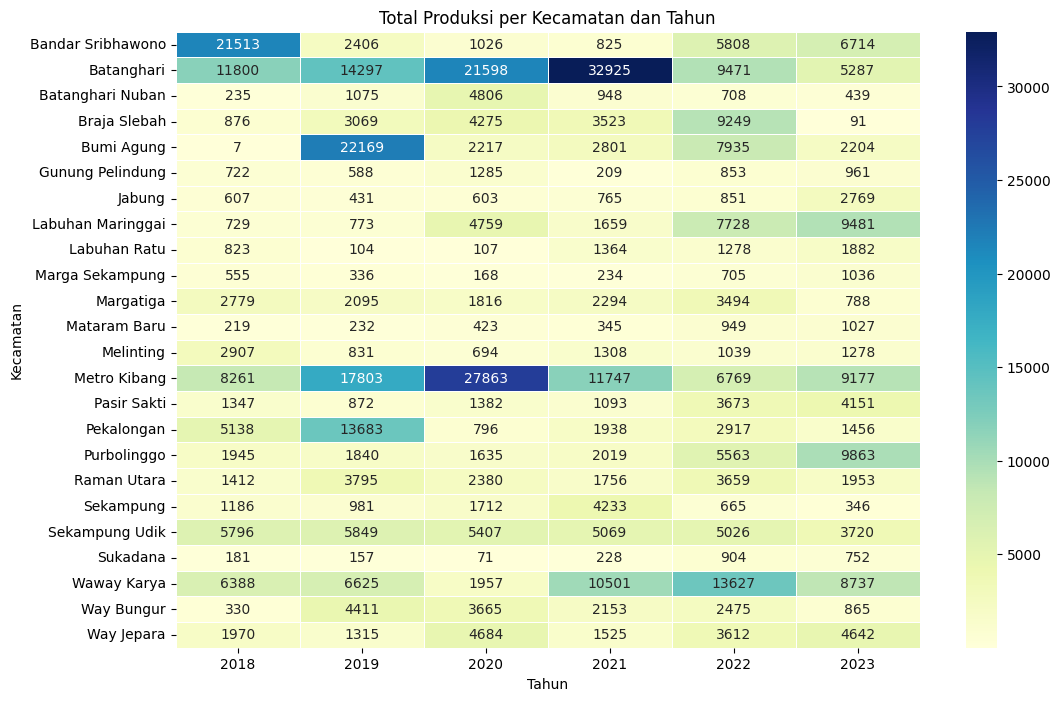

In [15]:
# Reshape the data for the heatmap
heatmap_data = data_baru.pivot_table(index='Kecamatan', columns='Tahun', values='Total Produksi')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5) # Customize the appearance as needed
plt.title('Total Produksi per Kecamatan dan Tahun')
plt.show()

In [16]:
# # Create 'Tingkat Produksi' column based on 'Total Produksi'
# def classify_production(production):
#   if production < 10000:
#     return 'Rendah'
#   elif 10000 <= production <= 20000:
#     return 'Sedang'
#   else:
#     return 'Tinggi'

# data_baru['Tingkat Produksi'] = data_baru['Total Produksi'].apply(classify_production)
# data_baru

In [17]:
# production_counts = data_baru.groupby('Tingkat Produksi')['Tingkat Produksi'].count()
# production_counts

### Berdasarkan Produksi per Satuan Luas

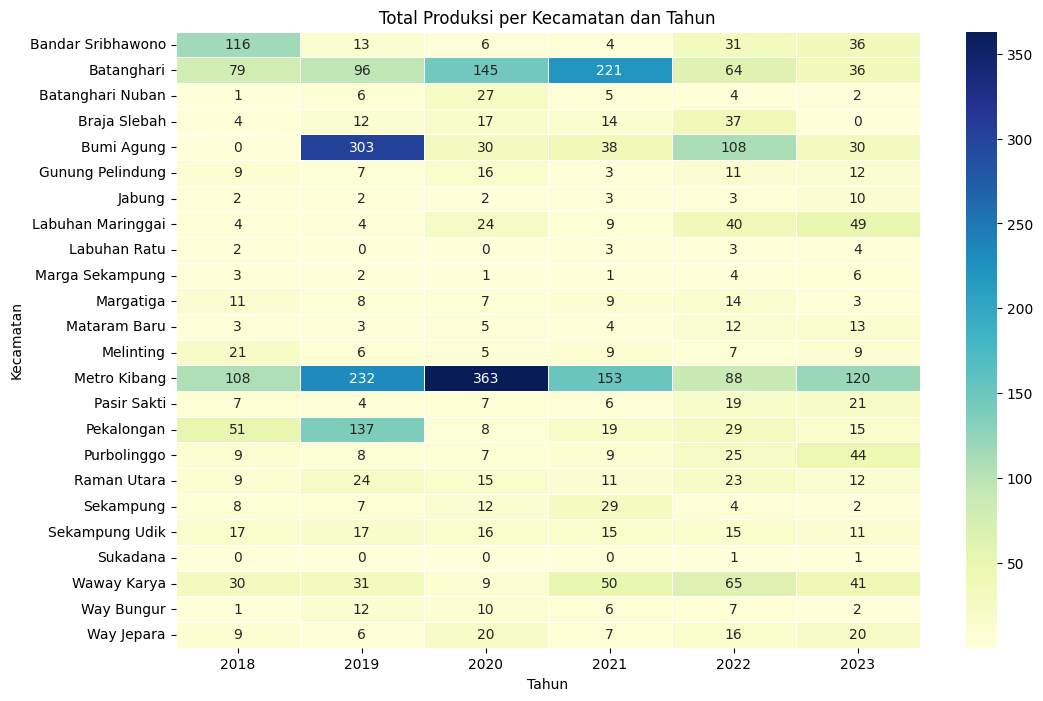

In [18]:
# Reshape the data for the heatmap
heatmap_data = data_baru.pivot_table(index='Kecamatan', columns='Tahun', values='Produksi per Satuan Luas')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5) # Customize the appearance as needed
plt.title('Total Produksi per Kecamatan dan Tahun')
plt.show()

In [19]:
# # Create 'Tingkat Produksi' column based on 'Total Produksi'
# def classify_production(production):
#   if production < 100:
#     return 'Rendah'
#   elif 100 <= production <= 200:
#     return 'Sedang'
#   else:
#     return 'Tinggi'

# data_baru['Tingkat Produksi'] = data_baru['Produksi per Satuan Luas'].apply(classify_production)
# data_baru

In [20]:
# production_counts = data_baru.groupby('Tingkat Produksi')['Tingkat Produksi'].count()
# production_counts

### Berdasarkan Kuantil Produksi per Satuan Luas



In [21]:
# Hitung kuantil untuk Produksi per Satuan Luas
production_density_quantiles = data_baru['Produksi per Satuan Luas'].quantile([0.33, 0.66])

# Fungsi untuk menentukan Tingkat Produksi
def classify_production_level(row):
    production_density = row['Produksi per Satuan Luas']
    if production_density <= production_density_quantiles[0.33]:
        return 'Rendah'
    elif production_density <= production_density_quantiles[0.66]:
        return 'Sedang'
    else:
        return 'Tinggi'

# Tambahkan kolom Tingkat Produksi
data_baru['Tingkat Produksi'] = data_baru.apply(classify_production_level, axis=1)

# Lihat hasil
data_baru

Tahun          Kecamatan  Total Produksi  Luas Wilayah (Km2)  \
0     2018  Bandar Sribhawono        21513.00            185.7067   
1     2019  Bandar Sribhawono         2406.00            185.7067   
2     2020  Bandar Sribhawono         1026.00            185.7067   
3     2021  Bandar Sribhawono          825.00            185.7067   
4     2022  Bandar Sribhawono         5808.00            185.7067   
5     2023  Bandar Sribhawono         6714.00            185.7067   
6     2018         Batanghari        11799.82            148.8795   
7     2019         Batanghari        14296.79            148.8795   
8     2020         Batanghari        21598.21            148.8795   
9     2021         Batanghari        32924.74            148.8795   
10    2022         Batanghari         9471.07            148.8795   
11    2023         Batanghari         5286.54            148.8795   
12    2018   Batanghari Nuban          235.00            180.6884   
13    2019   Batanghari Nuban         1075.00            180.6884   
14    2020   Batanghari Nuban         4806.00            180.6884   
15    2021   Batanghari Nuban          948.00            180.6884   
16    2022   Batanghari Nuban          708.00            180.6884   
17    2023   Batanghari Nuban          439.00            180.6884   
18    2018       Braja Slebah          876.00            247.6068   
19    2019       Braja Slebah         3069.00            247.6068   
20    2020       Braja Slebah         4275.00            247.6068   
21    2021       Braja Slebah         3523.00            247.6068   
22    2022       Braja Slebah         9249.00            247.6068   
23    2023       Braja Slebah           91.06            247.6068   
24    2018         Bumi Agung            6.60             73.1747   
25    2019         Bumi Agung        22169.00             73.1747   
26    2020         Bumi Agung         2217.00             73.1747   
27    2021         Bumi Agung         2801.00             73.1747   
28    2022         Bumi Agung         7935.00             73.1747   
29    2023         Bumi Agung         2204.00             73.1747   
30    2018   Gunung Pelindung          722.00             78.5225   
31    2019   Gunung Pelindung          588.00             78.5225   
32    2020   Gunung Pelindung         1285.00             78.5225   
33    2021   Gunung Pelindung          209.00             78.5225   
34    2022   Gunung Pelindung          853.00             78.5225   
35    2023   Gunung Pelindung          961.00             78.5225   
36    2018             Jabung          607.00            267.8454   
37    2019             Jabung          431.00            267.8454   
38    2020             Jabung          603.00            267.8454   
39    2021             Jabung          765.00            267.8454   
40    2022             Jabung          851.00            267.8454   
41    2023             Jabung         2769.00            267.8454   
42    2018  Labuhan Maringgai          729.00            194.9873   
43    2019  Labuhan Maringgai          773.00            194.9873   
44    2020  Labuhan Maringgai         4759.00            194.9873   
45    2021  Labuhan Maringgai         1659.00            194.9873   
46    2022  Labuhan Maringgai         7728.00            194.9873   
47    2023  Labuhan Maringgai         9481.00            194.9873   
48    2018       Labuhan Ratu          823.00            485.5122   
49    2019       Labuhan Ratu          104.00            485.5122   
50    2020       Labuhan Ratu          107.00            485.5122   
51    2021       Labuhan Ratu         1364.00            485.5122   
52    2022       Labuhan Ratu         1278.00            485.5122   
53    2023       Labuhan Ratu         1882.00            485.5122   
60    2018    Marga Sekampung          555.00            177.3234   
61    2019    Marga Sekampung          336.00            177.3234   
62    2020    Marga Sekampung          168.00            177.3234   
63 

In [22]:
production_counts = data_baru.groupby('Tingkat Produksi')['Tingkat Produksi'].count()
production_counts

Tingkat Produksi
Rendah    48
Sedang    47
Tinggi    49
Name: Tingkat Produksi, dtype: int64

In [23]:
# Mengurutkan data berdasarkan Tahun, kemudian Kecamatan
data_baru = data_baru.sort_values(by=['Tahun', 'Kecamatan']).reset_index(drop=True)
data_baru

Tahun          Kecamatan  Total Produksi  Luas Wilayah (Km2)  \
0     2018  Bandar Sribhawono        21513.00            185.7067   
1     2018         Batanghari        11799.82            148.8795   
2     2018   Batanghari Nuban          235.00            180.6884   
3     2018       Braja Slebah          876.00            247.6068   
4     2018         Bumi Agung            6.60             73.1747   
5     2018   Gunung Pelindung          722.00             78.5225   
6     2018             Jabung          607.00            267.8454   
7     2018  Labuhan Maringgai          729.00            194.9873   
8     2018       Labuhan Ratu          823.00            485.5122   
9     2018    Marga Sekampung          555.00            177.3234   
10    2018          Margatiga         2779.00            250.7294   
11    2018       Mataram Baru          219.08             79.5611   
12    2018          Melinting         2907.00            139.2974   
13    2018       Metro Kibang         8261.00             76.7783   
14    2018        Pasir Sakti         1347.00            193.9383   
15    2018         Pekalongan         5138.00            100.1281   
16    2018        Purbolinggo         1945.00            222.0337   
17    2018        Raman Utara         1412.00            161.3691   
18    2018          Sekampung         1186.00            148.3439   
19    2018     Sekampung Udik         5796.00            339.1245   
20    2018           Sukadana          181.00            756.7550   
21    2018        Waway Karya         6388.00            211.0732   
22    2018         Way Bungur          330.00            376.3819   
23    2018         Way Jepara         1970.48            229.2692   
24    2019  Bandar Sribhawono         2406.00            185.7067   
25    2019         Batanghari        14296.79            148.8795   
26    2019   Batanghari Nuban         1075.00            180.6884   
27    2019       Braja Slebah         3069.00            247.6068   
28    2019         Bumi Agung        22169.00             73.1747   
29    2019   Gunung Pelindung          588.00             78.5225   
30    2019             Jabung          431.00            267.8454   
31    2019  Labuhan Maringgai          773.00            194.9873   
32    2019       Labuhan Ratu          104.00            485.5122   
33    2019    Marga Sekampung          336.00            177.3234   
34    2019          Margatiga         2095.00            250.7294   
35    2019       Mataram Baru          232.32             79.5611   
36    2019          Melinting          831.00            139.2974   
37    2019       Metro Kibang        17803.00             76.7783   
38    2019        Pasir Sakti          872.00            193.9383   
39    2019         Pekalongan        13682.75            100.1281   
40    2019        Purbolinggo         1840.00            222.0337   
41    2019        Raman Utara         3795.00            161.3691   
42    2019          Sekampung          981.00            148.3439   
43    2019     Sekampung Udik         5849.00            339.1245   
44    2019           Sukadana          157.00            756.7550   
45    2019        Waway Karya         6625.00            211.0732   
46    2019         Way Bungur         4411.00            376.3819   
47    2019         Way Jepara         1315.14            229.2692   
48    2020  Bandar Sribhawono         1026.00            185.7067   
49    2020         Batanghari        21598.21            148.8795   
50    2020   Batanghari Nuban         4806.00            180.6884   
51    2020       Braja Slebah         4275.00            247.6068   
52    2020         Bumi Agung         2217.00             73.1747   
53    2020   Gunung Pelindung         1285.00             78.5225   
54    2020             Jabung          603.00            267.8454   
55    2020  Labuhan Maringgai         4759.00            194.9873   
56    2020       Labuhan Ratu          107.00            485.5122   
57 

In [24]:
data_baru.describe()

Tahun  Total Produksi  Luas Wilayah (Km2)  Bawang Daun (kuintal)  \
count   144.000000      144.000000          144.000000             144.000000   
mean   2020.500000     3811.327569          221.876250              65.361111   
std       1.713786     5341.174068          148.205861             285.549124   
min    2018.000000        6.600000           73.174700               0.000000   
25%    2019.000000      816.250000          146.082275               0.000000   
50%    2020.500000     1828.000000          189.822500               0.000000   
75%    2022.000000     4702.705000          248.387450               0.000000   
max    2023.000000    32924.740000          756.755000            2645.000000   

       Bawang Merah (kuintal)  Bayam (kuintal)  Blewah (kuintal)  \
count              144.000000       144.000000        144.000000   
mean                14.569444       144.291667          2.902778   
std                 64.394398       487.621470         19.799103   
min                  0.000000         0.000000          0.000000   
25%                  0.000000         0.000000          0.000000   
50%                  0.000000        21.500000          0.000000   
75%                  0.000000       112.500000          0.000000   
max                494.000000      5223.000000        164.000000   

       Buncis (kuintal)  Cabai Rawit (kuintal)  Kacang Merah (kuintal)  \
count        144.000000             144.000000              144.000000   
mean          49.493056             180.944444                0.173611   
std          194.595223             355.801720                1.430584   
min            0.000000               0.000000                0.000000   
25%            0.000000              22.000000                0.000000   
50%            0.000000              89.000000                0.000000   
75%           16.500000             223.750000                0.000000   
max         1961.000000            3704.000000               14.000000   

       Kacang Panjang (kuintal)  Kangkung (kuintal)  Kembang Kol (kuintal)  \
count                144.000000          144.000000             144.000000   
mean                 349.270833          250.784722              35.020833   
std                  814.101119          775.670963             211.293766   
min                    0.000000            0.000000               0.000000   
25%                   37.500000            0.000000               0.000000   
50%                  131.500000           31.000000               0.000000   
75%                  348.500000          157.000000               0.000000   
max                 7058.000000         5469.000000            2080.000000   

       Ketimun (kuintal)  Kubis (kuintal)  Labu Siam (kuintal)  \
count         144.000000       144.000000           144.000000   
mean          324.166667         0.277778             5.569444   
std          1124.031418         3.333333            19.275207   
min             0.000000         0.000000             0.000000   
25%             9.750000         0.000000             0.000000   
50%            73.000000         0.000000             0.000000   
75%           262.000000         0.000000             0.000000   
max         12320.000000        40.000000            96.000000   

       Melon (kuintal)  Paprika (kuintal)  Petsai/Sawi (kuintal)  \
count       144.000000         144.000000             144.000000   
mean         17.812500           0.208333              48.819444   
std          76.703768           1.563907             298.632282   
min           0.000000           0.000000               0.000000   
25%           0.000000           0.000000               0.000000   
50%           0.000000           0.000000               0.000000   
75%           0.000000           0.000000               0.000000   
max         719.000000          16.000000            3466.000000   

       Semangka (kuintal)  Terung (kuintal)  Tomat (kuintal)  \
count          144.000000   

# Visualisasi

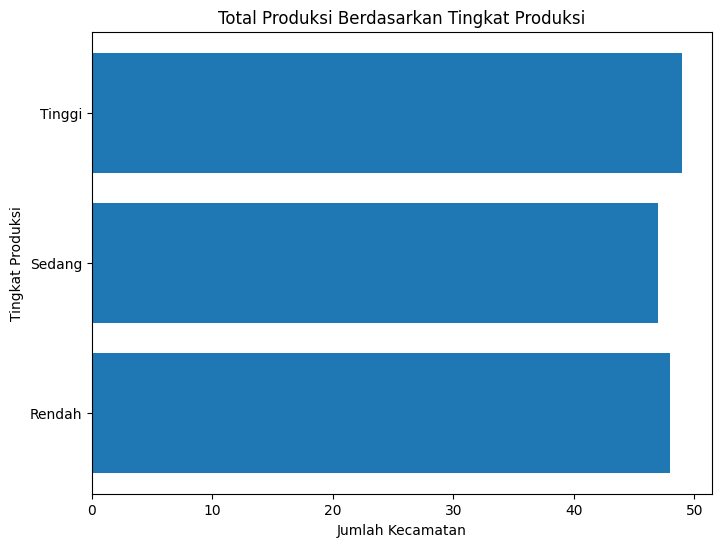

In [25]:
production_counts = data_baru.groupby('Tingkat Produksi')['Tingkat Produksi'].count()

plt.figure(figsize=(8, 6))
plt.barh(production_counts.index, production_counts.values)
plt.xlabel('Jumlah Kecamatan')
plt.ylabel('Tingkat Produksi')
plt.title('Total Produksi Berdasarkan Tingkat Produksi')
plt.show()

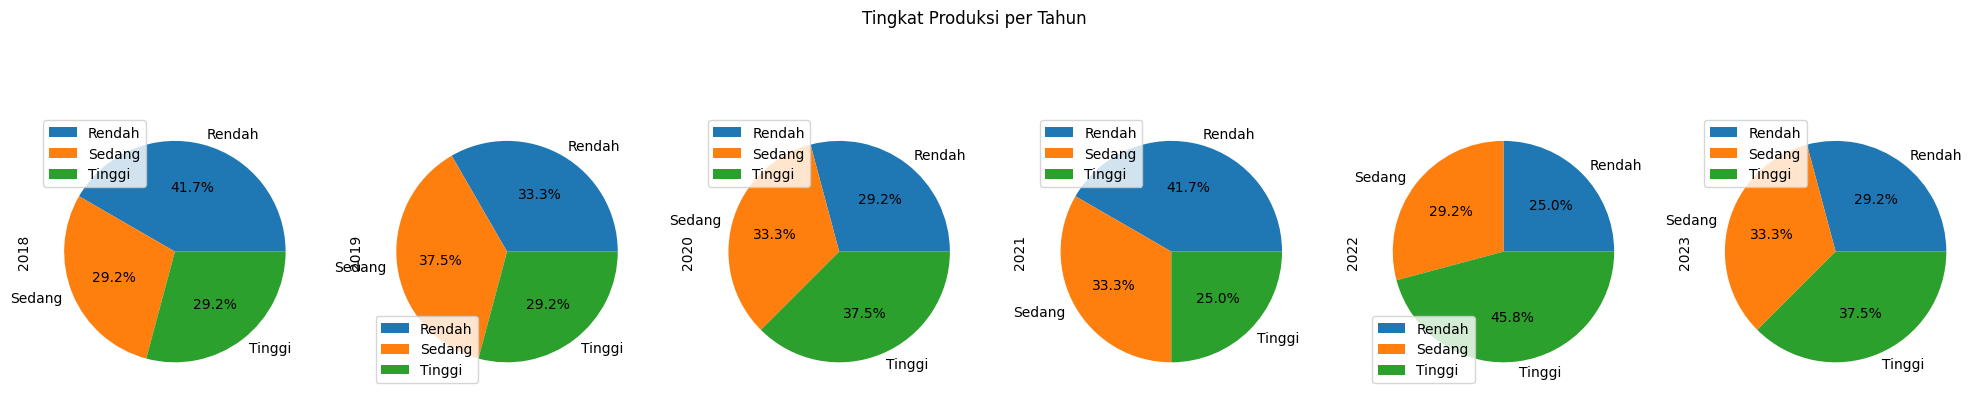

In [26]:
# Pie chart untuk tingkat produksi per tahun
production_by_year = data_baru.groupby('Tingkat Produksi')['Tahun'].value_counts().unstack()

production_by_year.plot(kind='pie', subplots=True, figsize=(25, 5), autopct='%1.1f%%', legend=True, title="Tingkat Produksi per Tahun")
plt.show()

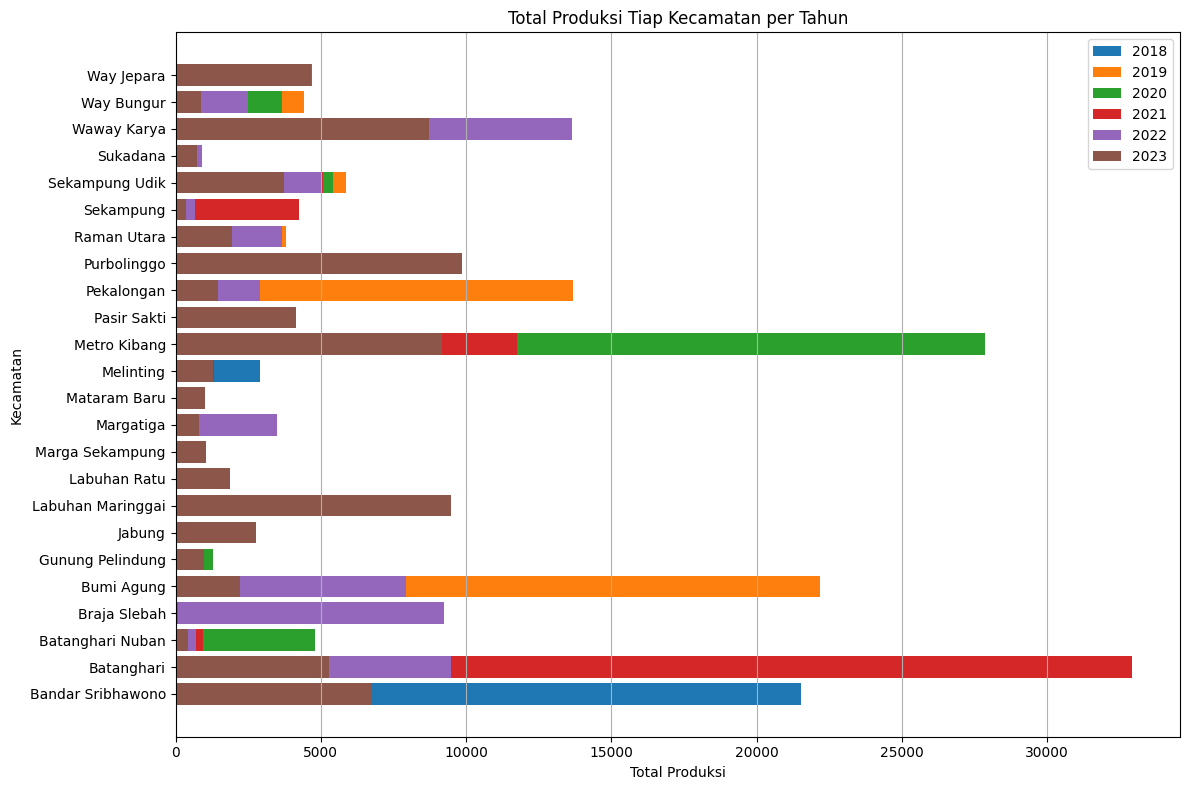

In [27]:
# Diagram batang horizontal untuk menampilkan total produksi tiap kecamatan untuk dibandingkan per tahunnya
production_by_kecamatan_year = data_baru.groupby(['Tahun', 'Kecamatan'])['Total Produksi'].sum().reset_index()

plt.figure(figsize=(12, 8))

for year in production_by_kecamatan_year['Tahun'].unique():
    year_data = production_by_kecamatan_year[production_by_kecamatan_year['Tahun'] == year]
    plt.barh(year_data['Kecamatan'], year_data['Total Produksi'], label=str(year))

plt.xlabel('Total Produksi')
plt.ylabel('Kecamatan')
plt.title('Total Produksi Tiap Kecamatan per Tahun')
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

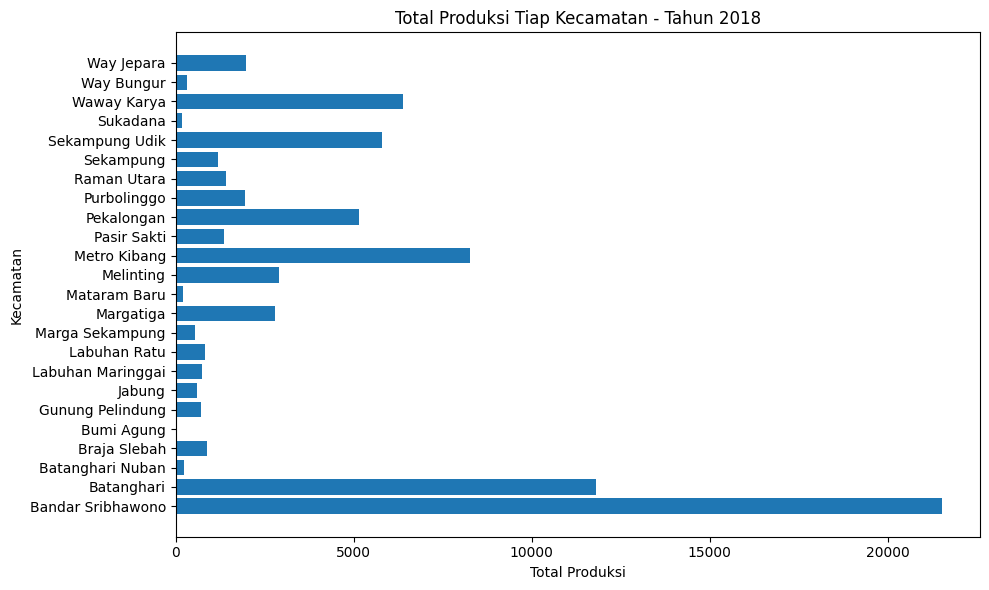

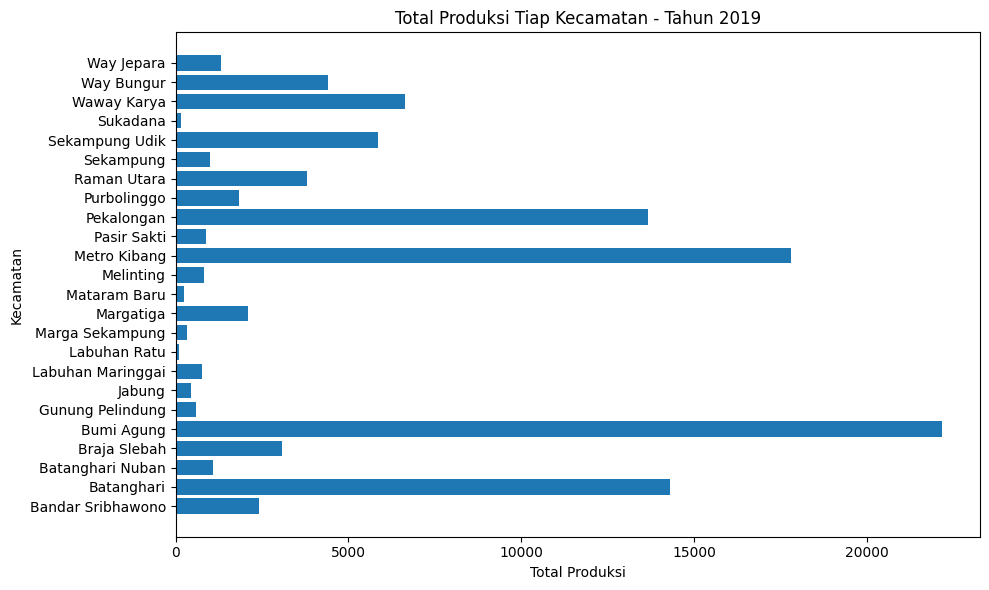

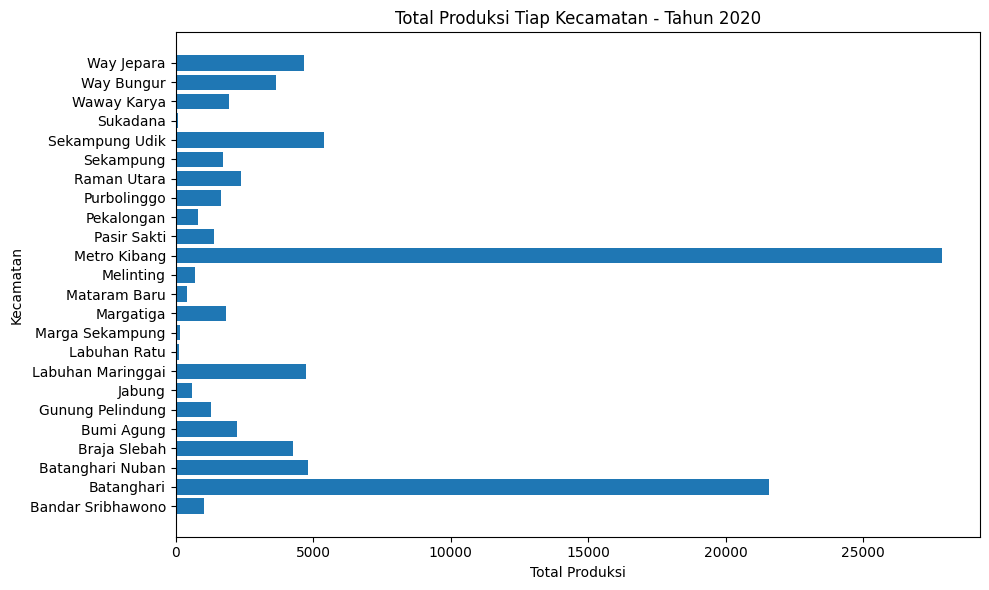

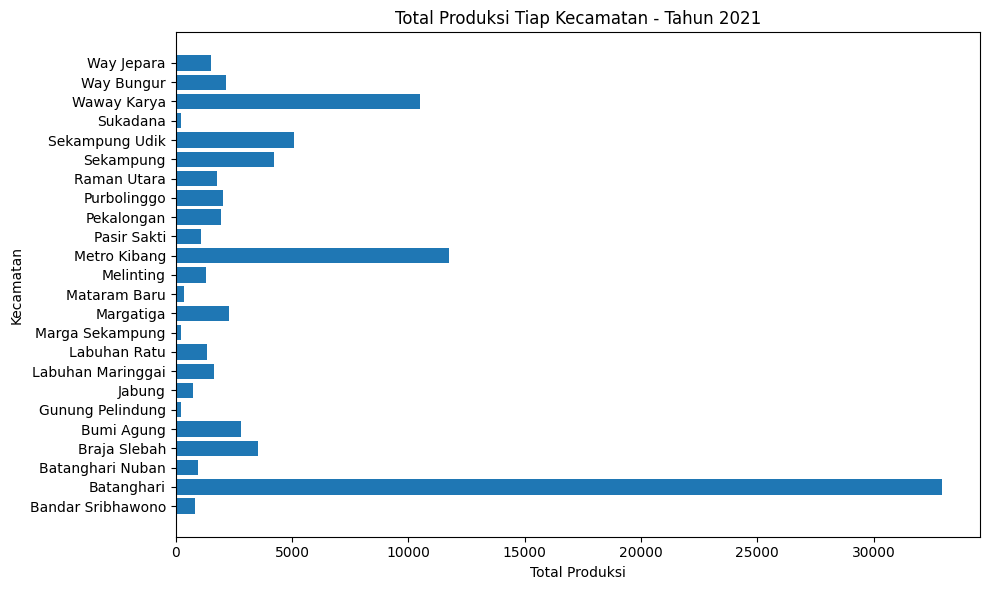

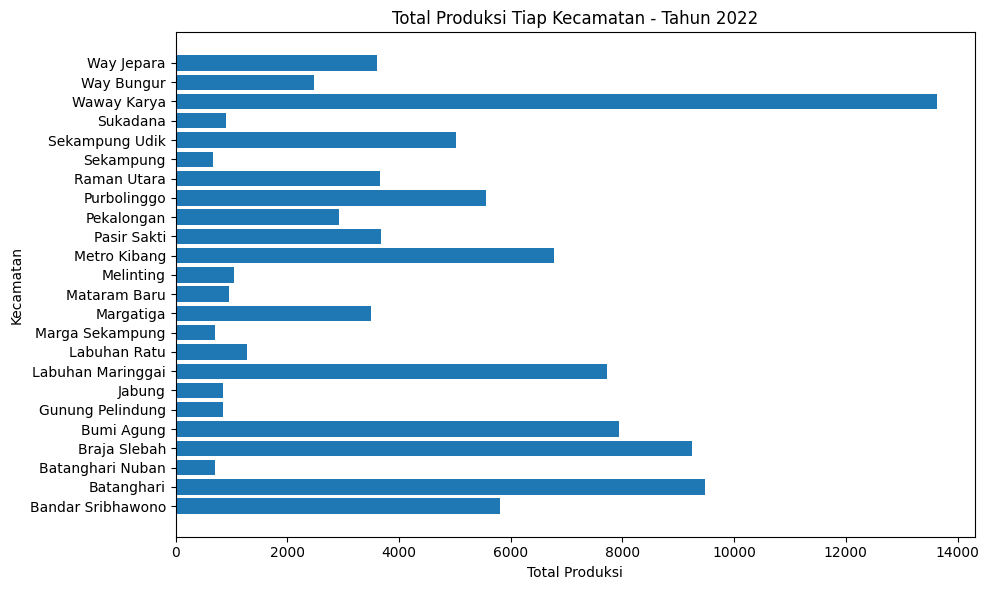

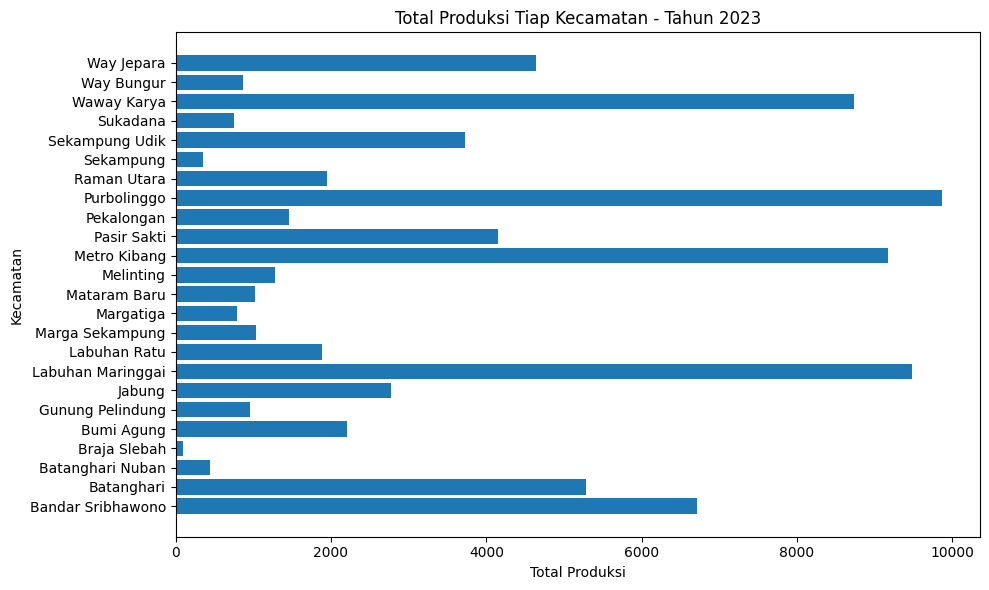

In [28]:
# Bar plot untuk melihat distribusi total produksi setiap kecamatan dalam satu tahun
production_by_kecamatan_year = data_baru.groupby(['Tahun', 'Kecamatan'])['Total Produksi'].sum().reset_index()

for year in production_by_kecamatan_year['Tahun'].unique():
    plt.figure(figsize=(10, 6))
    year_data = production_by_kecamatan_year[production_by_kecamatan_year['Tahun'] == year]
    plt.barh(year_data['Kecamatan'], year_data['Total Produksi'])
    plt.xlabel('Total Produksi')
    plt.ylabel('Kecamatan')
    plt.title(f'Total Produksi Tiap Kecamatan - Tahun {year}')
    plt.tight_layout()
    plt.show()

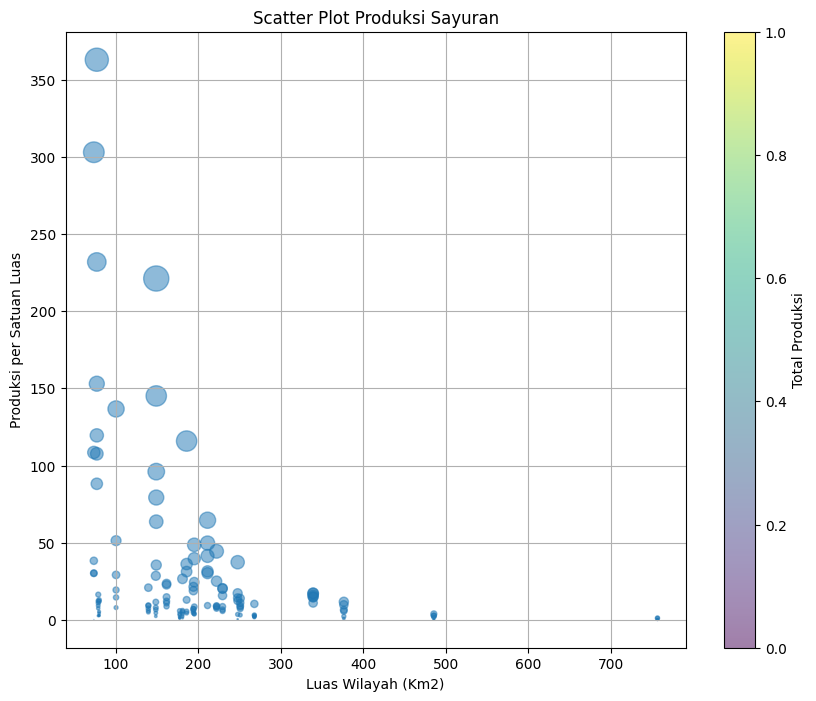

In [29]:
# Scatter plot dengan sumbu X = luas wilayah, sumbu Y = produksi per satuan luas, ukuran bubble = total produksi.
plt.figure(figsize=(10, 8))
plt.scatter(data_baru['Luas Wilayah (Km2)'], data_baru['Produksi per Satuan Luas'], s=data_baru['Total Produksi'] / 100, alpha=0.5) # Adjust the division factor for bubble size as needed
plt.xlabel('Luas Wilayah (Km2)')
plt.ylabel('Produksi per Satuan Luas')
plt.title('Scatter Plot Produksi Sayuran')
plt.colorbar(label="Total Produksi")
plt.grid(True)
plt.show()

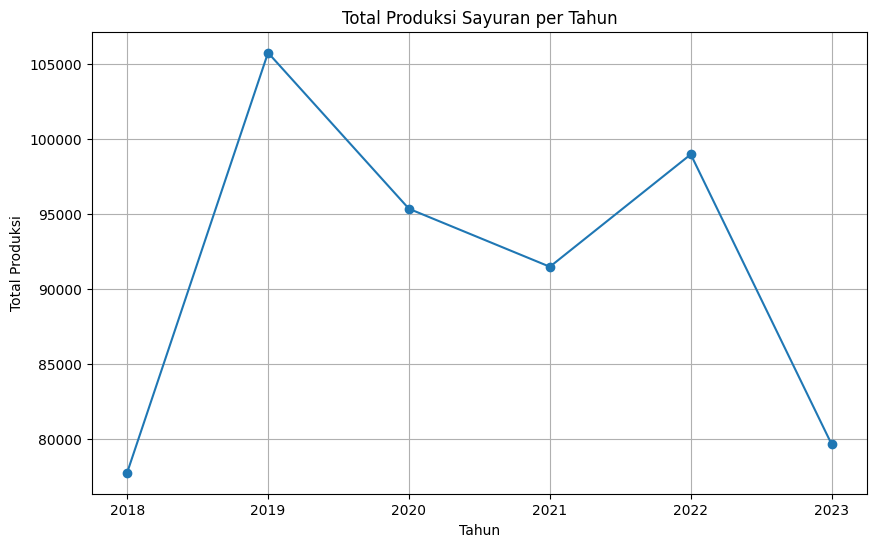

In [30]:
# Line chart untuk memvisualisasikan total produksi di berbagai tahun.
total_production_by_year = data_baru.groupby('Tahun')['Total Produksi'].sum()
plt.figure(figsize=(10, 6))
plt.plot(total_production_by_year.index, total_production_by_year.values, marker='o', linestyle='-')
plt.xlabel('Tahun')
plt.ylabel('Total Produksi')
plt.title('Total Produksi Sayuran per Tahun')
plt.grid(True)
plt.show()

# Modeling & Evaluation

In [31]:
# Konversi 'Tingkat Produksi' ke angka untuk korelasi (Rendah=0, Sedang=1, Tinggi=2)
df_encoded = data_baru.copy()
df_encoded["Tingkat Produksi"] = df_encoded["Tingkat Produksi"].map({"Rendah": 0, "Sedang": 1, "Tinggi": 2})

In [32]:
# Pilih fitur
selected_features = ["Produksi per Satuan Luas", "Total Produksi"]

# Buat X (fitur) dan y (target)
X = df_encoded[selected_features]
y = df_encoded["Tingkat Produksi"]

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 115
Jumlah data uji: 29


## Training

In [33]:
# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear")
}

# Training & Evaluasi
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {
        "Accuracy": acc,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Report": classification_report(y_test, y_pred)
    }

# Tampilkan hasil
summary = []

for name, result in results.items():
    summary.append({
        "Model": name,
        "Accuracy": f"{result['Accuracy']:.2%}",
        "Precision (Avg)": f"{sum(float(line.split()[1]) for line in result['Report'].splitlines()[2:5]) / 3:.2%}",
        "Recall (Avg)": f"{sum(float(line.split()[2]) for line in result['Report'].splitlines()[2:5]) / 3:.2%}",
        "F1-Score (Avg)": f"{sum(float(line.split()[3]) for line in result['Report'].splitlines()[2:5]) / 3:.2%}",
    })

# Konversi ke DataFrame untuk tampilan tabel
df_summary = pd.DataFrame(summary)
df_summary

Model Accuracy Precision (Avg) Recall (Avg) F1-Score (Avg)
0  Decision Tree  100.00%         100.00%      100.00%        100.00%
1  Random Forest  100.00%         100.00%      100.00%        100.00%
2            SVM   96.55%          97.00%       96.33%         96.33%

## Cross Validation

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Prepare X (features) and y (target)
X = data_baru[selected_features]
y = data_baru["Tingkat Produksi"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for Random Forest
rf_params = {
    "n_estimators": [10, 30, 50],
    "max_depth": [5, 10, 15],
    "min_samples_split": [5, 10, 15],
    "min_samples_leaf": [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring="accuracy", n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

# Hyperparameter tuning for SVM
svm_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto",  0.01, 0.1]
}

svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring="accuracy", n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)

# Best models
best_rf = rf_grid.best_estimator_
best_svm = svm_grid.best_estimator_

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

print("Best Random Forest Model:", rf_grid.best_params_)
evaluate_model(best_rf, X_test_scaled, y_test)

print("\nBest SVM Model:", svm_grid.best_params_)
evaluate_model(best_svm, X_test_scaled, y_test)

# Cross-validation
rf_cv_score = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy').mean()
svm_cv_score = cross_val_score(best_svm, X, y, cv=5, scoring='accuracy').mean()

print(f"\nCross-validation Accuracy - Random Forest: {rf_cv_score:.2%}")
print(f"Cross-validation Accuracy - SVM: {svm_cv_score:.2%}")


Best Random Forest Model: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 10}
Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

      Rendah       1.00      1.00      1.00        10
      Sedang       1.00      1.00      1.00         9
      Tinggi       1.00      1.00      1.00        10

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Best SVM Model: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 96.55%
Confusion Matrix:
[[10  0  0]
 [ 1  8  0]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

      Rendah       0.91      1.00      0.95        10
      Sedang       1.00      0.89      0.94         9
      Tinggi       1.00      1.00      1.00        10

    accuracy                      

# Uji dengan Data Dummy

In [35]:
data_path="/content/drive/MyDrive/Dataset KP/Produksi_2024.xlsx"
data_2024 = pd.read_excel(data_path)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data_2024

Kecamatan  Luas Wilayah (Km2)  Bawang Daun (kuintal)  \
0        Metro Kibang             76.7783                      0   
1          Batanghari            148.8795                    117   
2           Sekampung            148.3439                      0   
3           Margatiga            250.7294                      0   
4      Sekampung Udik            339.1245                     78   
5              Jabung            267.8454                     32   
6         Pasir Sakti            193.9383                     97   
7         Waway Karya            211.0732                      0   
8     Marga Sekampung            177.3234                      0   
9   Labuhan Maringgai            194.9873                     77   
10       Mataram Baru             79.5611                      0   
11  Bandar Sribhawono            185.7067                    142   
12          Melinting            139.2974                      0   
13   Gunung Pelindung             78.5225                     44   
14         Way Jepara            229.2692                      0   
15       Braja Slebah            247.6068                      7   
16       Labuhan Ratu            485.5122                      0   
17           Sukadana            756.7550                      0   
18         Bumi Agung             73.1747                      0   
19   Batanghari Nuban            180.6884                      0   
20         Pekalongan            100.1281                    406   
21        Raman Utara            161.3691                      0   
22        Purbolinggo            222.0337                      0   
23         Way Bungur            376.3819                      0   

    Bawang Merah (kuintal)  Bayam (kuintal)  Buncis (kuintal)  \
0                        0                0                 0   
1                        0              150                25   
2                        0               30                 0   
3                        0               36                 0   
4                        0               35                62   
5                      199              135                22   
6                        0               63                59   
7                        0                0                 0   
8                        0                0                 0   
9                        0              892               207   
10                       0                0                 0   
11                       0              101                 0   
12                       0                0                 0   
13                       0               18                16   
14                       0                0                 0   
15                       0                4                 4   
16                       0                0                 0   
17                       0                0                 0   
18                       0               93                84   
19                       0                8                 0   
20                       0              313                 0   
21                       0              183                 0   
22                       0              474                 0   
23                       0               53                 0   

    Cabai Rawit (kuintal)  Kacang Panjang (kuintal)  Kangkung (kuintal)  \
0                     117                       515                   0   
1                      28                       132                 125   
2                       3                        33                  12   
3                      45                        30                  40   
4                     181                       484                  66   
5                      59                       261                 160   
6                      69                       244                  75   
7                       0                         0                   0   
8         

In [36]:
# Rename the column
data_2024 = data_2024.rename(columns={"Produksi per satuan luas": "Produksi per Satuan Luas"})

In [37]:
# Hitung kuantil untuk Produksi per Satuan Luas
production_density_quantiles = data_2024['Produksi per Satuan Luas'].quantile([0.33, 0.66])

# Fungsi untuk menentukan Tingkat Produksi
def classify_production_level(row):
    production_density = row['Produksi per Satuan Luas']
    if production_density <= production_density_quantiles[0.33]:
        return 'Rendah'
    elif production_density <= production_density_quantiles[0.66]:
        return 'Sedang'
    else:
        return 'Tinggi'

# Tambahkan kolom Tingkat Produksi
data_2024['Tingkat Produksi'] = data_2024.apply(classify_production_level, axis=1)

# Lihat hasil
data_2024

Kecamatan  Luas Wilayah (Km2)  Bawang Daun (kuintal)  \
0        Metro Kibang             76.7783                      0   
1          Batanghari            148.8795                    117   
2           Sekampung            148.3439                      0   
3           Margatiga            250.7294                      0   
4      Sekampung Udik            339.1245                     78   
5              Jabung            267.8454                     32   
6         Pasir Sakti            193.9383                     97   
7         Waway Karya            211.0732                      0   
8     Marga Sekampung            177.3234                      0   
9   Labuhan Maringgai            194.9873                     77   
10       Mataram Baru             79.5611                      0   
11  Bandar Sribhawono            185.7067                    142   
12          Melinting            139.2974                      0   
13   Gunung Pelindung             78.5225                     44   
14         Way Jepara            229.2692                      0   
15       Braja Slebah            247.6068                      7   
16       Labuhan Ratu            485.5122                      0   
17           Sukadana            756.7550                      0   
18         Bumi Agung             73.1747                      0   
19   Batanghari Nuban            180.6884                      0   
20         Pekalongan            100.1281                    406   
21        Raman Utara            161.3691                      0   
22        Purbolinggo            222.0337                      0   
23         Way Bungur            376.3819                      0   

    Bawang Merah (kuintal)  Bayam (kuintal)  Buncis (kuintal)  \
0                        0                0                 0   
1                        0              150                25   
2                        0               30                 0   
3                        0               36                 0   
4                        0               35                62   
5                      199              135                22   
6                        0               63                59   
7                        0                0                 0   
8                        0                0                 0   
9                        0              892               207   
10                       0                0                 0   
11                       0              101                 0   
12                       0                0                 0   
13                       0               18                16   
14                       0                0                 0   
15                       0                4                 4   
16                       0                0                 0   
17                       0                0                 0   
18                       0               93                84   
19                       0                8                 0   
20                       0              313                 0   
21                       0              183                 0   
22                       0              474                 0   
23                       0               53                 0   

    Cabai Rawit (kuintal)  Kacang Panjang (kuintal)  Kangkung (kuintal)  \
0                     117                       515                   0   
1                      28                       132                 125   
2                       3                        33                  12   
3                      45                        30                  40   
4                     181                       484                  66   
5                      59                       261                 160   
6                      69                       244                  75   
7                       0                         0                   0   
8         

In [38]:
import joblib

# Path untuk menyimpan model
rf_model_path = "best_random_forest.pkl"
svm_model_path = "best_svm.pkl"
scaler_path = "scaler.pkl"

# Simpan model dan scaler
joblib.dump(best_rf, rf_model_path)
joblib.dump(best_svm, svm_model_path)
joblib.dump(scaler, scaler_path)

print("Model dan scaler berhasil disimpan!")

Model dan scaler berhasil disimpan!


In [39]:
# Pastikan hanya menggunakan fitur yang relevan
selected_features = ["Produksi per Satuan Luas", "Total Produksi"]
X_new = data_2024[selected_features]

# Load kembali scaler dan model
scaler = joblib.load(scaler_path)
best_rf = joblib.load(rf_model_path)
best_svm = joblib.load(svm_model_path)

# Standardisasi data baru
X_new_scaled = scaler.transform(X_new)

# Prediksi menggunakan model terbaik
rf_predictions = best_rf.predict(X_new_scaled)
svm_predictions = best_svm.predict(X_new_scaled)

# Tambahkan hasil prediksi ke dalam dataset
data_2024["Prediksi_RF"] = rf_predictions
data_2024["Prediksi_SVM"] = svm_predictions

# Simpan hasil prediksi ke file baru
predicted_data_path = "prediksi_Produksi_2024.xlsx"
data_2024.to_excel(predicted_data_path, index=False)

print(f"Prediksi selesai! Hasil disimpan di {predicted_data_path}")

Prediksi selesai! Hasil disimpan di prediksi_Produksi_2024.xlsx


In [40]:
# Menampilkan hasil prediksi
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data_2024

Kecamatan  Luas Wilayah (Km2)  Bawang Daun (kuintal)  \
0        Metro Kibang             76.7783                      0   
1          Batanghari            148.8795                    117   
2           Sekampung            148.3439                      0   
3           Margatiga            250.7294                      0   
4      Sekampung Udik            339.1245                     78   
5              Jabung            267.8454                     32   
6         Pasir Sakti            193.9383                     97   
7         Waway Karya            211.0732                      0   
8     Marga Sekampung            177.3234                      0   
9   Labuhan Maringgai            194.9873                     77   
10       Mataram Baru             79.5611                      0   
11  Bandar Sribhawono            185.7067                    142   
12          Melinting            139.2974                      0   
13   Gunung Pelindung             78.5225                     44   
14         Way Jepara            229.2692                      0   
15       Braja Slebah            247.6068                      7   
16       Labuhan Ratu            485.5122                      0   
17           Sukadana            756.7550                      0   
18         Bumi Agung             73.1747                      0   
19   Batanghari Nuban            180.6884                      0   
20         Pekalongan            100.1281                    406   
21        Raman Utara            161.3691                      0   
22        Purbolinggo            222.0337                      0   
23         Way Bungur            376.3819                      0   

    Bawang Merah (kuintal)  Bayam (kuintal)  Buncis (kuintal)  \
0                        0                0                 0   
1                        0              150                25   
2                        0               30                 0   
3                        0               36                 0   
4                        0               35                62   
5                      199              135                22   
6                        0               63                59   
7                        0                0                 0   
8                        0                0                 0   
9                        0              892               207   
10                       0                0                 0   
11                       0              101                 0   
12                       0                0                 0   
13                       0               18                16   
14                       0                0                 0   
15                       0                4                 4   
16                       0                0                 0   
17                       0                0                 0   
18                       0               93                84   
19                       0                8                 0   
20                       0              313                 0   
21                       0              183                 0   
22                       0              474                 0   
23                       0               53                 0   

    Cabai Rawit (kuintal)  Kacang Panjang (kuintal)  Kangkung (kuintal)  \
0                     117                       515                   0   
1                      28                       132                 125   
2                       3                        33                  12   
3                      45                        30                  40   
4                     181                       484                  66   
5                      59                       261                 160   
6                      69                       244                  75   
7                       0                         0                   0   
8         

In [41]:
# periksa akurasi hasil prediksi
predicted_data_path = "prediksi_Produksi_2024.xlsx"
data_2024 = pd.read_excel(predicted_data_path)

# Akurasi Model Random Forest
accuracy_rf = accuracy_score(data_2024["Tingkat Produksi"], data_2024["Prediksi_RF"])
print(f"Accuracy of Random Forest model on new data: {accuracy_rf:.4f}")

# Akurasi Model SVM
accuracy_svm = accuracy_score(data_2024["Tingkat Produksi"], data_2024["Prediksi_SVM"])
print(f"Accuracy of SVM model on new data: {accuracy_svm:.4f}")

Accuracy of Random Forest model on new data: 0.9167
Accuracy of SVM model on new data: 0.9583


In [42]:
# from google.colab import files
# files.download('prediksi_Produksi_2024.xlsx')

In [43]:
# from google.colab import files
# files.download('best_random_forest.pkl')
# files.download('best_svm.pkl')
# files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Deploying

In [44]:
!pip install streamlit pandas openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [45]:
pip install streamlit-option-menu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 10.6 MB/s eta 0:00:00


In [46]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

st.set_page_config(page_title="Prediksi Produksi Pertanian", page_icon="🌾", layout="wide")

svm_model = joblib.load("best_svm.pkl")
scaler = joblib.load("scaler.pkl")

def predict_tingkat_produksi(df):
    df = df.rename(columns={
        "Produksi per satuan luas": "Produksi per Satuan Luas",
        "Total produksi": "Total Produksi"
    })
    required_features = ["Produksi per Satuan Luas", "Total Produksi"]
    if not all(feature in df.columns for feature in required_features):
        st.error("❌ Kolom yang dibutuhkan tidak ditemukan dalam dataset!")
        return None
    df_scaled = scaler.transform(df[required_features])
    df["Tingkat Produksi"] = svm_model.predict(df_scaled)
    return df

st.markdown("""
    <h1 style='text-align: center; color: #FFD700;'>🌾 Prediksi Produksi Pertanian 🚜</h1>
    <hr style='border-color: #00FF00;'>
""", unsafe_allow_html=True)

uploaded_file = st.file_uploader("📂 **Upload file Excel**", type=["xlsx"])

if uploaded_file:
    df = pd.read_excel(uploaded_file)
    df = predict_tingkat_produksi(df)

    if df is not None:
        selected_columns = ["Kecamatan", "Luas Wilayah (Km2)", "Total Produksi", "Produksi per Satuan Luas", "Tingkat Produksi"]
        df_display = df[selected_columns] if all(col in df.columns for col in selected_columns) else df

        st.markdown("## 📊 Hasil Prediksi")
        st.success("✅ Prediksi berhasil dilakukan! Berikut hasilnya:")
        st.dataframe(df_display.style.applymap(lambda x: "color: #FF6F61;" if x == "Tinggi" else "color: #FFD700;" if x == "Sedang" else "color: #90EE90;", subset=["Tingkat Produksi"]))

        col1, col2 = st.columns([1, 2])

        with col1:
            st.markdown("## 🎨 Distribusi Kategori Produksi")
            kategori_counts = df_display["Tingkat Produksi"].value_counts()
            kategori_labels = kategori_counts.index
            kategori_values = kategori_counts.values

            fig = px.pie(names=kategori_labels, values=kategori_values, color=kategori_labels,
                         color_discrete_map={"Tinggi": "#FF6F61", "Sedang": "#FFD700", "Rendah": "#90EE90"},
                         hole=0.4)
            st.plotly_chart(fig)

        with col2:
            st.markdown("## ℹ️ Keterangan Jumlah Kategori")
            st.markdown(f"""
                **Jumlah Kategori:**
                - 🟥 **Tinggi:** {kategori_counts.get('Tinggi', 0)} data
                - 🟨 **Sedang:** {kategori_counts.get('Sedang', 0)} data
                - 🟩 **Rendah:** {kategori_counts.get('Rendah', 0)} data
            """)

        # Barchart
        st.markdown("## 📊 Total Produksi per Kecamatan")
        df_sorted = df_display.sort_values(by="Total Produksi", ascending=True)
        fig = px.bar(df_sorted, x="Total Produksi", y="Kecamatan", orientation='h',
                         color="Total Produksi", color_continuous_scale=["#FFF700", "#FFB400", "#FF8800"],
                         title="Total Produksi per Kecamatan")
        st.plotly_chart(fig)

        st.markdown("## 📉 Produksi per Satuan Luas per Kecamatan")
        df_sorted_luas = df_display.sort_values(by="Produksi per Satuan Luas", ascending=True)
        fig_luas = px.bar(df_sorted_luas, x="Produksi per Satuan Luas", y="Kecamatan", orientation='h',
                          color="Produksi per Satuan Luas", color_continuous_scale="blues",
                          title="Produksi per Satuan Luas per Kecamatan")
        st.plotly_chart(fig_luas)

Writing app.py


In [47]:
!pkill ngrok || echo "No process killed"
!rm -rf /usr/local/bin/ngrok
!rm -rf ~/.ngrok2
!pip uninstall -y pyngrok

No process killed


In [48]:
# Download versi terbaru
!wget -q -O ngrok.zip https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-stable-linux-amd64.zip

# Ekstrak & pindahkan ke sistem
!unzip -o ngrok.zip
!chmod +x ngrok
!mv ngrok /usr/local/bin/ngrok

# Cek versi (HARUS >= 3.6.0)
!ngrok --version

Archive:  ngrok.zip
  inflating: ngrok                   
ngrok version 3.21.0


In [49]:
!pip install pyngrok==5.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 745.3/745.3 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=18986 sha256=8fe6a265ef17b1b535f2fb62ad697f69196d0fa3296547a6da8ea584666edffe
  Stored in directory: /root/.cache/pip/wheels/3b/93/5d/1f668a3f992994da593a1a3a998de7888738ca45bf8867ea91
Successfully built pyngrok


In [50]:
!pip install --upgrade pyngrok
from pyngrok import ngrok, conf

# Paksa pyngrok pakai versi ngrok terbaru
conf.get_default().ngrok_path = "/usr/local/bin/ngrok"

!ngrok authtoken 2u9ZEDJwGH0EP1FlmUylUOdVXNy_4DL44VJPGabnqkaFrmvGk

  Attempting uninstall: pyngrok
    Found existing installation: pyngrok 5.1.0
    Uninstalling pyngrok-5.1.0:
      Successfully uninstalled pyngrok-5.1.0
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [51]:
import os
import subprocess
from threading import Thread

# Jalankan Streamlit di background
def run_streamlit():
    os.system("streamlit run app.py --server.port=8501 --server.address=0.0.0.0")

Thread(target=run_streamlit).start()

# Buka public URL pakai ngrok
url = ngrok.connect(8501, "http")
print(f"🚀 Aplikasi bisa diakses di: {url.public_url}")

🚀 Aplikasi bisa diakses di: https://d967-104-199-151-67.ngrok-free.app
